
# **Introduction**

This notebook focuses on researching statistical information regarding the customer's banking profile. In this book, we will explore and use EDA techniques to gain insight.

### **Defining the problem statement**
The dataset contains various credit related variable like credit age, types of loan, credit utilization and so on along with their credit score categorised into Good, Standard and bad. We want to analyze which variables influences the credit score and how.


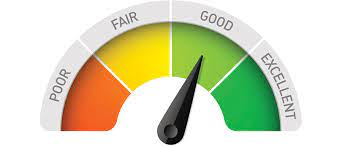

### **Methodology**

For this particular notebook, we will first resolve the data's inconsistency caused by incorrectt data types and entries using first regex to find the correct value and then coverting them to suitable datatype. Continuing the cleanup process, we resolve missing values by grouping the data on customer id and imputing them with average or mode based on the column. Next we drop all the unneccseray and inconsistent columns. We then created dummy data to handle categorical data by crating our own custom method to retain multiple count of same loan. We later handled credit history age by converting ages to months. Now, concluding the data to gain insights drawn with visulaizations.

In [27]:
# import required libraries
import pandas as pd
import numpy as np
import re

### **Data Exploration**
The dataset has 50000 records with 27 variables of 12500 unique customers. Every customer has 4 records for 4 consecutive months. The dataset also has columns with missing values ranging from 1% to 15%.


In [28]:
# read csv
bank_df = pd.read_csv("/content/Bank_Data.csv")
bank_df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


In [29]:
print(f"shape of the data {bank_df.shape}")
print(f"No. of unique customers {len(bank_df.Customer_ID.unique())}")

shape of the data (50000, 27)
No. of unique customers 12500


In [30]:
#converting column name to lowercase
bank_df.columns = [i.lower() for i in bank_df.columns]
#show columns
bank_df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance'],
      dtype='object')

In [31]:
bank_df[['interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit']].head(10)

,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit
0,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27
1,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27
2,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27
3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27
4,6,1,Credit-Builder Loan,3,1,5.42
5,6,1,Credit-Builder Loan,3,3,5.42
6,6,1,Credit-Builder Loan,3,NaN,5.42
7,6,1,Credit-Builder Loan,3,2_,7.42
8,8,3,"Auto Loan, Auto Loan, and Not Specified",8,1942,7.1
9,8,3,"Auto Loan, Auto Loan, and Not Specified",6,3,2.1


In [32]:
#check missing values
bank_df.isnull().sum()

id                             0
customer_id                    0
month                          0
name                        5015
age                            0
ssn                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       7498
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
type_of_loan                5704
delay_from_due_date            0
num_of_delayed_payment      3498
changed_credit_limit           0
num_credit_inquiries        1035
credit_mix                     0
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          4470
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly     2271
payment_behaviour              0
monthly_balance              562
dtype: int64

In [33]:
#check data types of all columns
bank_df.dtypes

id                           object
customer_id                  object
month                        object
name                         object
age                          object
ssn                          object
occupation                   object
annual_income                object
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                  object
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment       object
changed_credit_limit         object
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt             object
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly      object
payment_behaviour            object
monthly_balance              object
dtype: object

In [34]:
#remove unnecessary columns
#removing num_credit_inquiries as data is inconsistent
bank_df.drop(columns = ["ssn", "name", "num_credit_inquiries"], inplace =True)

In [35]:
#check categorical variable for incorrect data
print(bank_df.month.unique())
print(bank_df.occupation.unique())
print(bank_df.credit_mix.unique())
print(bank_df.payment_of_min_amount.unique())

['September' 'October' 'November' 'December']
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
['Good' '_' 'Standard' 'Bad']
['No' 'Yes' 'NM']


### **Treating missing value + Data cleaning**
many columns has data in the incorrect format, for e.g. integar columns has alphabets present along with numbers. We will use regex to get the correct values and then fill the missing values by grouping the data on the customer id and then imputing the missing value by mean/mode of the variable for that customer in the grouped data.

In [36]:
#Impute Nulls and correct Datatypes
#Divide the data into datatypes to treat them differently

int_columns = ['age', 'num_of_loan', 'num_of_delayed_payment']

float_columns = ['monthly_balance', 'monthly_inhand_salary', 'amount_invested_monthly',
                 'total_emi_per_month', 'outstanding_debt', 'annual_income']
str_columns = {
    'credit_mix' : ['Good', 'Standard', 'Bad'],
    'occupation': ['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
                  'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
                  'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
    'payment_of_min_amount' : ['No', 'Yes'],
    'payment_behaviour' :['Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments',
                          'High_spent_Large_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments']
              }

averaging_columns = ['num_of_delayed_payment', 'monthly_inhand_salary', 'monthly_balance', 'amount_invested_monthly']

def impute_nulls(df : pd.DataFrame, index_column:str, column: str):
  """
  fill nulls values in df with value in other rows for same customer
  """
  notnull_df = df.loc[~df[column].isna(), [index_column, column]].reset_index(drop = True)
  #group column based on "customer_id" and find the mode for each customer
  if column in averaging_columns:
    grouped = notnull_df.groupby([index_column], sort =False, as_index = False)[column].agg(lambda x: np.mean(x))
  else:
    #replace with mode
    grouped = notnull_df.groupby([index_column], sort =False, as_index = False)[column].agg(lambda x: x.value_counts().index[0])
  grouped  = grouped.reset_index(drop =True)
  #record count
  null_count = df[column].isnull().sum()
  impute_count = 0
  delete_count = 0
  #drop index if grouped df also has null value
  drop_index = []
  for idx, row in df.iterrows():
    # if value is none impute it other value for same id
    if pd.isnull(row[column]):
      try:
        impute_value = grouped.loc[grouped[index_column] == row[index_column],[column]]
        impute_value = impute_value.iloc[0,0]
        df.loc[idx, column] = impute_value
        impute_count+=1
      except Exception as e:
        #drop row if no value is present for same id
        drop_index.append(idx)
        delete_count +=1
  #delete rows
  df = df.drop(index = drop_index)
  return df, null_count, impute_count, delete_count


def convert_int(df: pd.DataFrame, index_column:str, column: str):
  """
  This function convert column datatype to int and also impute null values
  """
  #create empty list to record index with no integar
  drop_index = []
  drop_count = 0
  #find the int value in the string if present.
  for idx, row in df.iterrows():
    if not pd.isnull(row[column]):
      try:
        df.loc[idx, column] = int(re.search("\d+", str(row[column])).group(0))
      except Exception as e:
        #remove the record if not present
        drop_index.append(idx)
        drop_count +=1
  #delete rows
  df = df.drop(index = drop_index)
  #fill nulls
  df, null_count, impute_count, delete_count = impute_nulls(df, index_column, column)
  print(f"Total no. of value imputed for column {column} is {impute_count}/{null_count} and {drop_count + delete_count} rows are deleted")
  df[column] = df[column].astype('int64')
  return df


def convert_float(df: pd.DataFrame, index_column:str, column: str):
  """
  This function convert column datatype to float and also impute null values
  """
  #create empty list to record index with no float
  drop_index = []
  drop_count = 0
  # find the float value in the string if present.
  for idx, row in df.iterrows():
    if not pd.isnull(row[column]):
      try:
        df.loc[idx, column] = float(re.search("\d+\.\d+", str(row[column])).group(0))
      except:
        #remove the record if not present
        drop_index.append(idx)
        drop_count +=1
  #drop rows
  df  = df.drop(index=drop_index)
  #fill null values
  df, null_count, impute_count, delete_count = impute_nulls(df, index_column, column)
  print(f"Total no. of value imputed for column {column} is {impute_count}/{null_count} and {delete_count} rows are deleted")
  df[column] = df[column].astype('float64')
  return df


def convert_str(df : pd.DataFrame, column: str, index_column: str, unique_values: list):
  """
  This function convert values to null if it is other than acceptable value
  and later in imputes all nulls
  """
  #replace value with nan if not in acceptable values
  df[column] = df[column].apply(lambda x : x if x in unique_values else np.nan)
  #fills nulls
  df, null_count, impute_count, delete_count = impute_nulls(df, index_column, column)
  print(f"Total no. of value imputed for column {column} is {impute_count}/{null_count} and {delete_count} rows are deleted")
  df[column] = df[column].astype('str')
  return df


for column in int_columns:
  bank_df = convert_int(bank_df, 'customer_id', column)

for column in float_columns:
  bank_df = convert_float(bank_df, 'customer_id', column)

for column,unique_values in str_columns.items():
  bank_df = convert_str(bank_df, column, 'customer_id', unique_values)

bank_df, null_count, impute_count, delete_count = impute_nulls(bank_df, 'customer_id', 'type_of_loan')
print(f"Total no. of value imputed for column type_of_loan is {impute_count}/{null_count} and {delete_count} rows are deleted")

Total no. of value imputed for column age is 0/0 and 0 rows are deleted
Total no. of value imputed for column num_of_loan is 0/0 and 0 rows are deleted
Total no. of value imputed for column num_of_delayed_payment is 3494/3498 and 4 rows are deleted
Total no. of value imputed for column monthly_balance is 558/562 and 4 rows are deleted
Total no. of value imputed for column monthly_inhand_salary is 7469/7497 and 28 rows are deleted
Total no. of value imputed for column amount_invested_monthly is 2268/2269 and 1 rows are deleted
Total no. of value imputed for column total_emi_per_month is 0/0 and 0 rows are deleted
Total no. of value imputed for column outstanding_debt is 0/0 and 0 rows are deleted
Total no. of value imputed for column annual_income is 0/0 and 0 rows are deleted
Total no. of value imputed for column credit_mix is 9244/9367 and 123 rows are deleted
Total no. of value imputed for column occupation is 3274/3274 and 0 rows are deleted
Total no. of value imputed for column pay

In [37]:
print(f'shape of the data - {bank_df.shape}')
print(f"No. of unique customers {len(bank_df.customer_id.unique())}")

shape of the data - (42210, 24)
No. of unique customers 11026


### **Data Wrangling**
Converting raw data into more useful forms.
The following columns requires to be transformed:
* Type of loan
* Credit history age
* Payment behaviour

In [38]:
#Handling type of loan, credit history age, payment behaviour
bank_df.loc[0:10, ['type_of_loan', 'payment_behaviour', 'credit_history_age']]

,type_of_loan,payment_behaviour,credit_history_age
0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Small_value_payments,22 Years and 9 Months
1,"Auto Loan, Credit-Builder Loan, Personal Loan,...",High_spent_Medium_value_payments,22 Years and 10 Months
2,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Low_spent_Medium_value_payments,NaN
3,"Auto Loan, Credit-Builder Loan, Personal Loan,...",High_spent_Medium_value_payments,23 Years and 0 Months
4,Credit-Builder Loan,High_spent_Large_value_payments,27 Years and 3 Months
5,Credit-Builder Loan,Low_spent_Large_value_payments,27 Years and 4 Months
6,Credit-Builder Loan,High_spent_Large_value_payments,27 Years and 5 Months
7,Credit-Builder Loan,High_spent_Large_value_payments,27 Years and 6 Months
8,"Auto Loan, Auto Loan, and Not Specified",Low_spent_Medium_value_payments,18 Years and 5 Months
9,"Auto Loan, Auto Loan, and Not Specified",Low_spent_Large_value_payments,18 Years and 6 Months


In [39]:
#handling type of loan
#Removing spaces and 'and'
bank_df['type_of_loan'] = bank_df['type_of_loan'].apply(lambda x: (',').join(list(loan.replace('and', '').strip() for loan in x.split(','))))
bank_df['type_of_loan'].head()


0    Auto Loan,Credit-Builder Loan,Personal Loan,Ho...
1    Auto Loan,Credit-Builder Loan,Personal Loan,Ho...
2    Auto Loan,Credit-Builder Loan,Personal Loan,Ho...
3    Auto Loan,Credit-Builder Loan,Personal Loan,Ho...
4                                  Credit-Builder Loan
Name: type_of_loan, dtype: object

##### Creating custom function to convert categorical variable (Type of loan) into dummy data to not lose mutiple count of loan

In [40]:
#finding unique loans
unique_values_set = set()

for value in bank_df["type_of_loan"]:
    value_list = [item.replace(" and ","").strip() for item in str(value).split(",") if item.strip() not in unique_values_set]
    unique_values_set.update(value_list)

unique_values = list(unique_values_set)
unique_values

['Debt Consolidation Loan',
 'Home Equity Loan',
 'Student Loan',
 'Auto Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Personal Loan',
 'Credit-Builder Loan',
 'Not Specified']

In [41]:
#creating dummy data and retaining multiple count of same loan
for column in unique_values:
  bank_df[column.lower().strip()]= np.zeros(bank_df.shape[0], dtype = int)

from collections import Counter
for index,row in bank_df.iterrows():
  for loan, cnt in Counter(row['type_of_loan'].split(',')).items():
    bank_df.loc[index, loan.lower()] = cnt

bank_df.iloc[0:10,-9:]

,debt consolidation loan,home equity loan,student loan,auto loan,payday loan,mortgage loan,personal loan,credit-builder loan,not specified
0,0,1,0,1,0,0,1,1,0
1,0,1,0,1,0,0,1,1,0
2,0,1,0,1,0,0,1,1,0
3,0,1,0,1,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,1,0
8,0,0,0,2,0,0,0,0,1
9,0,0,0,2,0,0,0,0,1


In [42]:
#Handling credit history age
#converting age to months
bank_df['credit_history_age']=bank_df['credit_history_age'].apply(
    lambda x:(int(x[0:2].strip())*12 + int(x[-9:-7].strip())) if not pd.isnull(x) else x)

In [43]:
#filling nans : Forward fill while adding 1
bank_df = bank_df.reset_index(drop = True)
for index, value in enumerate(bank_df['credit_history_age']):
  if pd.isnull(value):
    bank_df.loc[index, 'credit_history_age'] = bank_df.loc[index-1, 'credit_history_age']+1

print(bank_df['credit_history_age'].isnull().sum())

0


In [44]:
bank_df.dtypes

id                           object
customer_id                  object
month                        object
age                           int64
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int64
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment        int64
changed_credit_limit         object
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
debt consolidation loan       int64
home equity loan              int64
student loan                  int64
auto loan                   

In [45]:
bank_df.isnull().sum()

id                          0
customer_id                 0
month                       0
age                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
debt consolidation loan     0
home equity loan            0
student loan                0
auto loan                   0
payday loan                 0
mortgage loan               0
personal loan               0
credit-builder loan         0
not specified               0
dtype: int

### **Data Visualization**
Visual Analysis after pre-processing of the data:
* Correlation heatmap
* Age v/s Credit score
* Credit history age V/s Credit score
* Occupation v/s Avg. delay from due date
* Age v/s Avg. delay

In [46]:
bank_df.columns

Index(['id', 'customer_id', 'month', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit', 'credit_mix',
       'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'debt consolidation loan', 'home equity loan', 'student loan',
       'auto loan', 'payday loan', 'mortgage loan', 'personal loan',
       'credit-builder loan', 'not specified'],
      dtype='object')

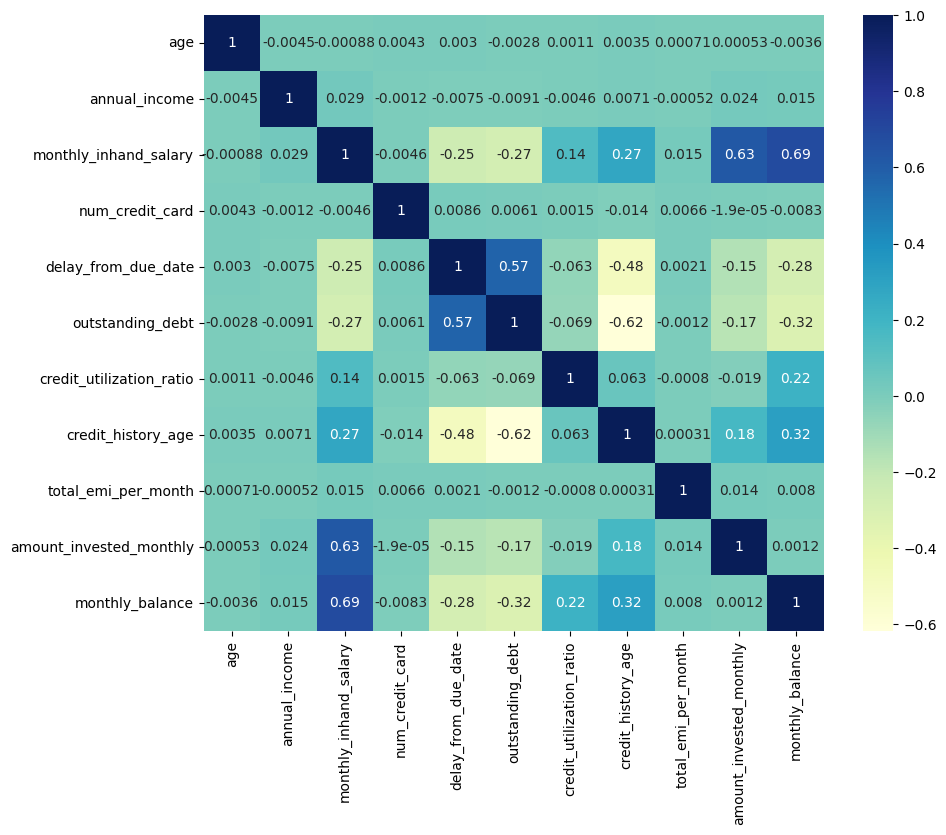

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

corr_cols = ['age', 'annual_income',
       'monthly_inhand_salary', 'num_credit_card',
       'delay_from_due_date',
       'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 'total_emi_per_month',
       'amount_invested_monthly', 'monthly_balance']


dataplot = sns.heatmap(bank_df[corr_cols].corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [64]:
#Create pivot df
def pivot_df(df, column1, column2, bins = None):
  if bins:
    df[column1] = pd.cut(df[column1], bins)
  df = df[[column1, column2]].groupby([column1, column2], sort =False, as_index = False).size()
  df_grouped = df.groupby(column1, sort =False, as_index = False).sum(['size']).rename(columns = {'size': 'total_size'})

  df = pd.merge(df,
                df_grouped,
                left_on = column1,
                right_on = column1,
                how = 'inner')

  df['percentage'] = np.floor((df['size']/df['total_size'])*100)

  df = df.pivot(index=column1, columns=column2, values='percentage').reset_index()
  return df

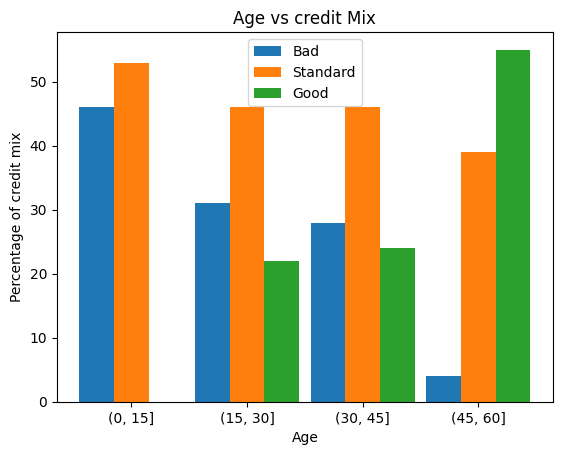

In [65]:
#Age vs Credit mix
bins = [0,15,30,45,60]
df = pivot_df(bank_df.copy(), 'age', 'credit_mix', bins = bins)

X_axis = np.arange(df.shape[0])

plt.bar(X_axis - 0.3, df['Bad'], 0.3, label = 'Bad')
plt.bar(X_axis, df['Standard'], 0.3, label = 'Standard')
plt.bar(X_axis + 0.3, df['Good'], 0.3, label = 'Good')

plt.xticks(X_axis, df['age'])
plt.xlabel("Age")
plt.ylabel("Percentage of credit mix")
plt.title("Age vs credit Mix")
plt.legend()
plt.show()

* The plot depicts the direct relationship between age and credit score, more the age the better is the credit score of the individual.

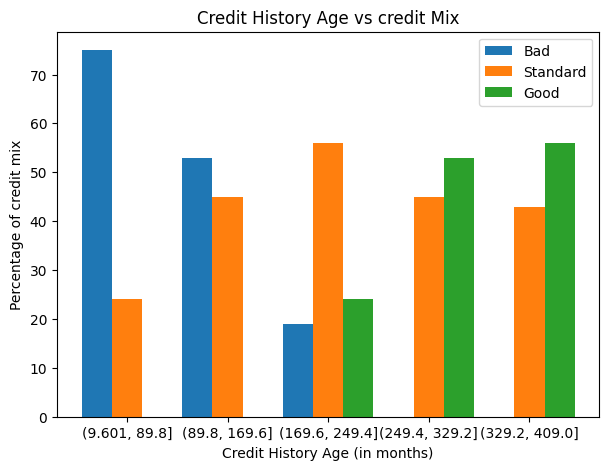

In [66]:
#Credit history vs credit mix
df = pivot_df(bank_df.copy(), 'credit_history_age', 'credit_mix', bins = 5)

X_axis = np.arange(df.shape[0])

plt.figure(figsize=(7,5))
plt.bar(X_axis - 0.3, df['Bad'], 0.3, label = 'Bad')
plt.bar(X_axis, df['Standard'], 0.3, label = 'Standard')
plt.bar(X_axis + 0.3, df['Good'], 0.3, label = 'Good')

plt.xticks(X_axis, df['credit_history_age'])
plt.xlabel("Credit History Age (in months)")
plt.ylabel("Percentage of credit mix")
plt.title("Credit History Age vs credit Mix")
plt.legend()
plt.show()

* The worst credit score is for individuals with least credit history age.
* The good credit score requires atleast 14 years of credit history.


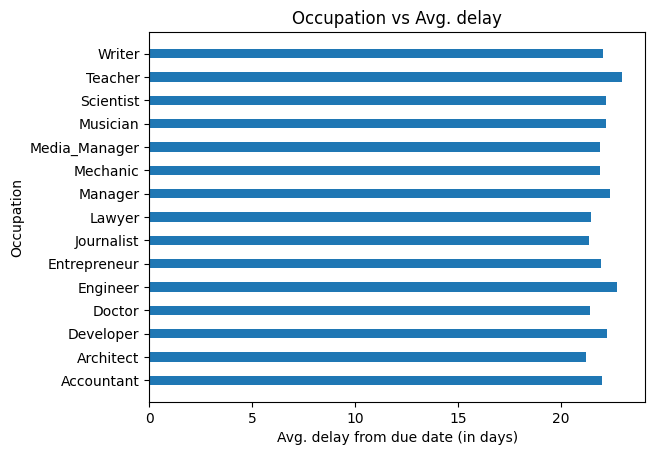

In [67]:
#Occupation vs delay_from_due_date
def avg_df(df, column1, column2, bins = None):
  if bins:
    df[column1] = pd.cut(df[column1], bins)
  df = df[[column1, column2]].groupby([column1]).agg(lambda x : np.mean(x)).reset_index()
  return df

df = avg_df(bank_df.copy(), 'occupation', 'delay_from_due_date')

X_axis = np.arange(df.shape[0])

plt.barh(X_axis, df['delay_from_due_date'], 0.4)

plt.yticks(X_axis, df['occupation'])
plt.xlabel("Avg. delay from due date (in days)")
plt.ylabel("Occupation")
plt.title("Occupation vs Avg. delay")
plt.show()

* Occupation has no effect on late payments neither on credit score.

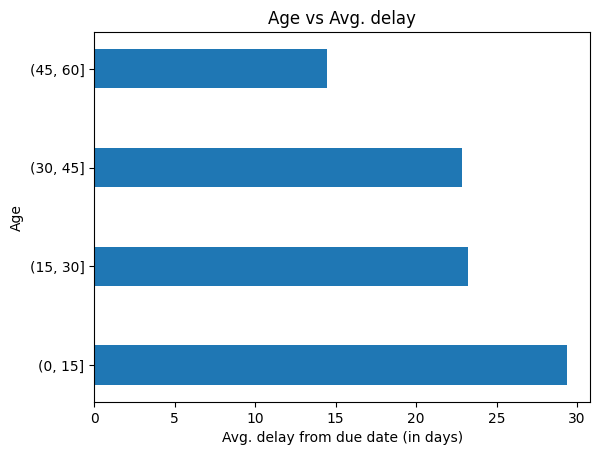

In [68]:
bins = [0,15,30,45,60]

df = avg_df(bank_df.copy(), 'age', 'delay_from_due_date', bins)

X_axis = np.arange(df.shape[0])

plt.barh(X_axis, df['delay_from_due_date'], 0.4)

plt.yticks(X_axis, df['age'])
plt.xlabel("Avg. delay from due date (in days)")
plt.ylabel("Age")
plt.title("Age vs Avg. delay")
plt.show()

* Young individuals are more likely to not pay the dues in time which affects their credit score.

In [88]:
#age vs type of loan (stacked bar plot)
def sum_df(df, column1, columns_list, bins = None):
  full_columns_list  = columns_list+[column1]
  df = df[full_columns_list]
  if bins:
    df[column1] = pd.cut(df[column1], bins)
  df = df.groupby([column1])[columns_list].sum().reset_index()

  df['total_sum']=df.loc[:,columns_list].sum(axis = 1)

  df[columns_list] = df[columns_list].div(df['total_sum'], axis = 0)
  return df

unique_values = ['Home Equity Loan','Personal Loan','Student Loan','Mortgage Loan','Auto Loan',
                 'Credit-Builder Loan','Debt Consolidation Loan','Not Specified','Payday Loan']

unique_values = [x.lower() for x in unique_values]

df = sum_df(bank_df.copy(), 'credit_mix', unique_values)

df.head()

,credit_mix,home equity loan,personal loan,student loan,mortgage loan,auto loan,credit-builder loan,debt consolidation loan,not specified,payday loan,total_sum
0,Bad,0.111587,0.109459,0.110015,0.111170,0.107261,0.115942,0.109626,0.109292,0.115649,71881
1,Good,0.109162,0.110065,0.113990,0.108259,0.106453,0.109822,0.110656,0.116352,0.115240,28792
2,Standard,0.110157,0.110424,0.109447,0.109403,0.107997,0.115352,0.110157,0.113280,0.113783,67567


count    42210.00000
mean        23.69140
std        131.64202
min          0.00000
25%          4.00000
50%          6.00000
75%          7.00000
max       1499.00000
Name: num_credit_card, dtype: float64


<Figure size 1000x700 with 0 Axes>

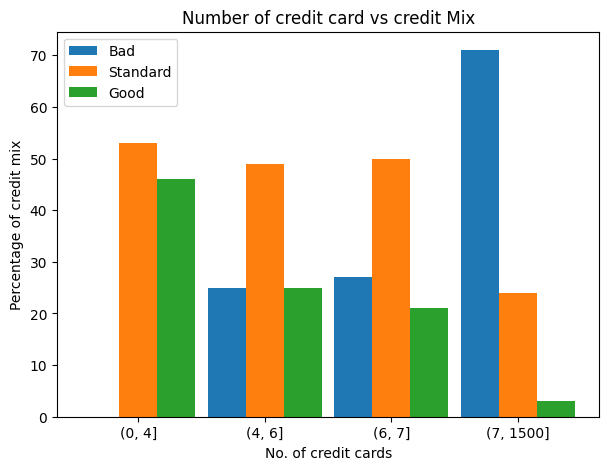

In [95]:
#num of credit card vs credit mix
fig = plt.figure(figsize =(10, 7))

print(bank_df['num_credit_card'].describe())
bins = [0,4,6,7,1500]

df = pivot_df(bank_df.copy(), 'num_credit_card', 'credit_mix', bins)
df.head()

# show plot
X_axis = np.arange(df.shape[0])

plt.figure(figsize=(7,5))
plt.bar(X_axis - 0.3, df['Bad'], 0.3, label = 'Bad')
plt.bar(X_axis, df['Standard'], 0.3, label = 'Standard')
plt.bar(X_axis + 0.3, df['Good'], 0.3, label = 'Good')

plt.xticks(X_axis, df['num_credit_card'])
plt.xlabel("No. of credit cards")
plt.ylabel("Percentage of credit mix")
plt.title("Number of credit card vs credit Mix")
plt.legend()
plt.show()

* Owning multiple credit cards, in general more than 4 is discouraged for good credit score.

count    42210.000000
mean        32.165255
std          5.073579
min         20.509652
25%         27.941300
50%         32.172439
75%         36.364212
max         47.288987
Name: credit_utilization_ratio, dtype: float64


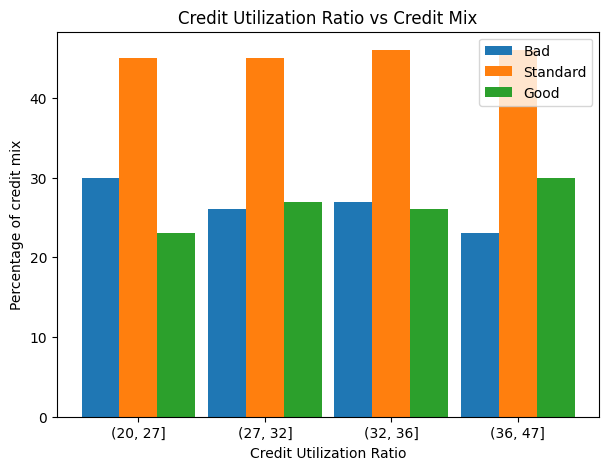

In [98]:
#credit utilization vs delay from due date
print(bank_df['credit_utilization_ratio'].describe())

bins = [20,27,32,36,47]

df = pivot_df(bank_df.copy(), 'credit_utilization_ratio', 'credit_mix', bins)
df.head()

# show plot
X_axis = np.arange(df.shape[0])

plt.figure(figsize=(7,5))
plt.bar(X_axis - 0.3, df['Bad'], 0.3, label = 'Bad')
plt.bar(X_axis, df['Standard'], 0.3, label = 'Standard')
plt.bar(X_axis + 0.3, df['Good'], 0.3, label = 'Good')

plt.xticks(X_axis, df['credit_utilization_ratio'])
plt.xlabel("Credit Utilization Ratio")
plt.ylabel("Percentage of credit mix")
plt.title("Credit Utilization Ratio vs Credit Mix")
plt.legend()
plt.show()


* Credit utilization also impact credit score to some extent. Higher credit utilization improve the credit score.

count    42210.000000
mean        21.980692
std         15.236374
min         -5.000000
25%         10.000000
50%         19.000000
75%         29.000000
max         67.000000
Name: delay_from_due_date, dtype: float64


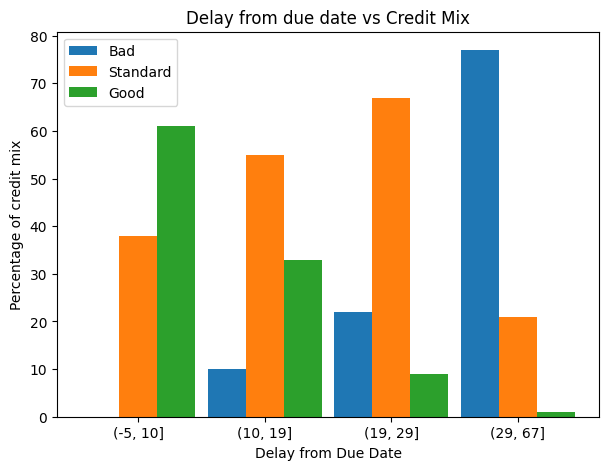

In [100]:
print(bank_df['delay_from_due_date'].describe())
bins = [-5,10,19,29,67]

df = pivot_df(bank_df.copy(), 'delay_from_due_date', 'credit_mix', bins)
df.head()

# show plot
X_axis = np.arange(df.shape[0])

plt.figure(figsize=(7,5))
plt.bar(X_axis - 0.3, df['Bad'], 0.3, label = 'Bad')
plt.bar(X_axis, df['Standard'], 0.3, label = 'Standard')
plt.bar(X_axis + 0.3, df['Good'], 0.3, label = 'Good')

plt.xticks(X_axis, df['delay_from_due_date'])
plt.xlabel("Delay from Due Date")
plt.ylabel("Percentage of credit mix")
plt.title("Delay from due date vs Credit Mix")
plt.legend()
plt.show()

* Paying the dues on time leads to better credit score.
* Paying the dues one month after significantly reduces the credit score.

